In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\graykar\Documents\Annaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
Iris_Data = pd.read_csv("C:\\Users\\graykar\\Downloads\\Pyhton\\Data Files\\Iris.csv")

In [7]:
Iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
Iris_Data.shape

(150, 6)

In [10]:
Iris_Data.drop('Id' , axis=1 ,inplace=True)

In [18]:
Iris_Data['Species'] = Iris_Data['Species'].apply( lambda x : 1 if x == 'Iris-versicolor' 
                                                                 else ( 2 if x == 'Iris-virginica' else 3  ))

In [19]:
Iris_Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [20]:
train_X = Iris_Data.loc[: , [x for x in Iris_Data.columns if x not in ['Species']] ]
train_y = Iris_Data['Species']

In [21]:
from sklearn.preprocessing import StandardScaler 
StandardScaler = StandardScaler()
train_X = StandardScaler.fit_transform(train_X)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_X , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(train_y, KNN.predict(train_X))
con_mat

array([[47,  3,  0],
       [ 4, 46,  0],
       [ 0,  0, 50]], dtype=int64)

In [28]:
error = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(train_X , train_y)
    pred_i = KNN.predict(train_X)
    error.append(np.mean(pred_i != train_y))

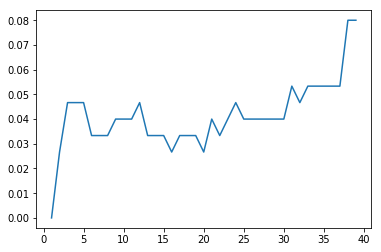

In [29]:
plt.plot(range(1,40) , error)